# 3(b)
Take grayscale image of size 512x512, add some salt & pepper noise and perform the following operations –

Use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression and observe their performance in term of PSNR


###### Akif Islam <br> Department of CSE-RU <br> iamakifislam@gmail.com <br> 19th September 2023

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# Read Image

In [28]:
img = cv2.imread("../Resource-Images/Mini.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(512,512))

# Copy an Instance

In [29]:
original_img = img.copy()

In [30]:
original_img

array([[120, 120, 118, ...,  78,  67,  66],
       [116, 121, 118, ...,  72,  67,  65],
       [118, 120, 120, ...,  70,  66,  65],
       ...,
       [132, 125, 133, ..., 119,  97,  88],
       [138, 125, 136, ..., 104,  88,  77],
       [134, 133, 135, ...,  90,  74,  73]], dtype=uint8)

In [31]:
np.pad(original_img,1,mode="wrap")

array([[ 73, 134, 133, ...,  74,  73, 134],
       [ 66, 120, 120, ...,  67,  66, 120],
       [ 65, 116, 121, ...,  67,  65, 116],
       ...,
       [ 77, 138, 125, ...,  88,  77, 138],
       [ 73, 134, 133, ...,  74,  73, 134],
       [ 66, 120, 120, ...,  67,  66, 120]], dtype=uint8)

In [32]:
original_img = img.copy()

In [33]:
height,width = img.shape

# Adding Salt and Pepper

In [34]:
def make_noisy_image(img, percentage_of_salt_pepper):

    noisy_img = img.copy()


    total_pixel = height*width
    effected_pixels = round(percentage_of_salt_pepper*total_pixel)
    # print("Total Pixels : ",total_pixel)
    unlucky_pixels = {}
    print("Effected Pixels:", round(percentage_of_salt_pepper*total_pixel))

    for i in range (effected_pixels):
        # generate two random index
        rand_i = random.randint(0,height-1)
        rand_j = random.randint(0,width-1)

        while(noisy_img[rand_i][rand_j]==255 or noisy_img[rand_i][rand_j]==0):
            rand_i = random.randint(0,height-1)
            rand_j = random.randint(0,width-1)

        # A dictionary to count lucky pixels.
        # Lucky pixels are those who are not effected by salt/pepper
        if (rand_i,rand_j) in unlucky_pixels:
            unlucky_pixels[(rand_i,rand_j)]+=1
        else:
            unlucky_pixels[(rand_i,rand_j)] = 1

        if i%2 == 0:
            noisy_img[rand_i][rand_j] = 255 # Pepper
        else:
            noisy_img[rand_i][rand_j] = 0 # Salt

    print("Lucky Pixels : ",total_pixel-len(unlucky_pixels))
    return noisy_img

# PSNR Calculator

In [35]:
# Formula : PSNR = 20log(Max Pixel Value) - 10logo(Mean Squared Error)

def calculate_PSNR(img,noisy_img):
    img = img.astype(np.float128)
    noisy_img = noisy_img.astype(np.float128)

    max_pixel = np.max(img)
    mean_squared_error = np.mean((img - noisy_img)**2)
    PSNR = 20*np.log10(max_pixel)-10*np.log10(mean_squared_error)

    return round(PSNR,2)

# Filtering Image Function with NxN Mask

In [36]:
def filter_image(noise_mat,filter_type,mask):
    # print("Noise Matrix Shape : ",noise_mat.shape)
    filtered_image = noise_mat.copy()

    mask_size = mask
    mask_left = mask_size//2
    mask_right = mask_left+1

    filtered_image = np.pad(filtered_image,mask_left,mode='wrap')
    # print("After Padding Shape : ",filtered_image.shape)


    if filter_type == "median":
        for i in range (mask_left,height+1):
            for j in range(mask_left,width+1):
                median = np.median(filtered_image[(i-mask_left):(i+mask_right),(j-mask_left):(j+mask_right)])
                filtered_image[i][j] = median

    

    elif filter_type== "average":
        for i in range (mask_left,height+1):
            for j in range(mask_left,width+1):
                avg = np.mean(filtered_image[(i-mask_left):(i+mask_right),(j-mask_left):(j+mask_right)])
                filtered_image[i][j] = avg
        
    # print("Filtered Image Shape : ",filtered_image.shape)
    return np.array(filtered_image[1:height+1,1:width+1])


# Apply Average Filter with Wrap Padding

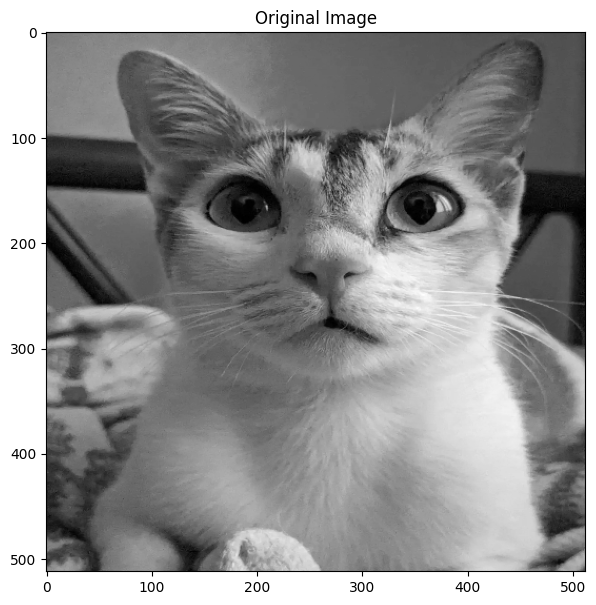

1
Effected Pixels: 5767
Lucky Pixels :  256377
Generated Noisy Image : 1/40
2


Generated Filtered Image : 2/40,3x3
3
Generated Filtered Image : 3/40,5x5
4
Generated Filtered Image : 4/40, 7x7
5
Effected Pixels: 28836
Lucky Pixels :  233308
Generated Noisy Image : 5/40
6
Generated Filtered Image : 6/40,3x3
7
Generated Filtered Image : 7/40,5x5
8
Generated Filtered Image : 8/40, 7x7
9
Effected Pixels: 51905
Lucky Pixels :  210239
Generated Noisy Image : 9/40
10
Generated Filtered Image : 10/40,3x3
11
Generated Filtered Image : 11/40,5x5
12
Generated Filtered Image : 12/40, 7x7
13
Effected Pixels: 74973
Lucky Pixels :  187171
Generated Noisy Image : 13/40
14
Generated Filtered Image : 14/40,3x3
15
Generated Filtered Image : 15/40,5x5
16
Generated Filtered Image : 16/40, 7x7
17
Effected Pixels: 98042
Lucky Pixels :  164102
Generated Noisy Image : 17/40
18


In [37]:
# Original Image Plot
plt.figure(figsize=(7,7))
plt.imshow(original_img,cmap='gray')
plt.title("Original Image")
plt.show()

plt.figure(figsize=(16,40))

# Noisy - Filtered Image Plot
cnt = 10

for i in range(1,41,4):
    for j in range(4):
      print(i+j)
      # Show Noisy Image
      if j==0:
          cur_noisy_img = make_noisy_image(img,float((i+j)*0.022))
          # print(f"Noise Applied on {round(float(i/(20-0.1)),2)*10}% pixels")
          plt.subplot(10,4,i+j) #3

          plt.imshow(cur_noisy_img,cmap='gray')
          plt.title(f"{round((float((i+j)*0.022)*100),1)}%,PSNR:{calculate_PSNR(img,cur_noisy_img)}dB")
          cnt+=10
          print(f"Generated Noisy Image : {i+j}/40")

      # Show 3x3 Filtered Image
      if j==1:
        cur_filtered_img = filter_image(cur_noisy_img,"average",3)

        plt.subplot(10,4,i+j) #3

        plt.imshow(cur_filtered_img,cmap='gray')
        plt.title(f"Filtered in 3X3,PSNR:{calculate_PSNR(img,cur_filtered_img)}dB")

        print(f"Generated Filtered Image : {i+j}/40,3x3")

      # Show 5x5 Filtered Image
      if j==2:
        cur_filtered_img = filter_image(cur_noisy_img,"average",5)

        plt.subplot(10,4,i+j) #3

        plt.imshow(cur_filtered_img,cmap='gray')
        plt.title(f"Filtered in 5x5,PSNR:{calculate_PSNR(img,cur_filtered_img)}dB")

        print(f"Generated Filtered Image : {i+j}/40,5x5")

      # Show 7x7 Filtered Image

      if j==3:
        cur_filtered_img = filter_image(cur_noisy_img,"average",7)

        plt.subplot(10,4,i+j) #3

        plt.imshow(cur_filtered_img,cmap='gray')
        plt.title(f"Filtered in 7x7,PSNR:{calculate_PSNR(img,cur_filtered_img)}dB")

        print(f"Generated Filtered Image : {i+j}/40, 7x7")


plt.tight_layout()
plt.savefig("PSNR_Compare_in_Different_Mask_manual_function.jpg")
plt.show()


# With Built in PSNR

In [ ]:
# Original Image Plot
plt.figure(figsize=(7,7))
plt.imshow(original_img,cmap='gray')
plt.title("Original Image")
plt.show()

plt.figure(figsize=(16,40))

# Noisy - Filtered Image Plot
cnt = 10

for i in range(1,41,4):
    for j in range(4):
      print(i+j)
      # Show Noisy Image
      if j==0:
          cur_noisy_img = make_noisy_image(img,float((i+j)*0.022))
          # print(f"Noise Applied on {round(float(i/(20-0.1)),2)*10}% pixels")
          plt.subplot(10,4,i+j) #3

          plt.imshow(cur_noisy_img,cmap='gray')
          plt.title(f"{round((float((i+j)*0.022)*100),1)}%,PSNR:{cv2.PSNR(img,cur_filtered_img)}dB")
          cnt+=10
          print(f"Generated Noisy Image : {i+j}/40")

      # Show 3x3 Filtered Image
      if j==1:
        cur_filtered_img = filter_image(cur_noisy_img,"average",3)

        plt.subplot(10,4,i+j) #3

        plt.imshow(cur_filtered_img,cmap='gray')
        plt.title(f"Filtered in 3X3,PSNR:{cv2.PSNR(img,cur_filtered_img)}dB")

        print(f"Generated Filtered Image : {i+j}/40,3x3")

      # Show 5x5 Filtered Image
      if j==2:
        cur_filtered_img = filter_image(cur_noisy_img,"average",5)

        plt.subplot(10,4,i+j) #3

        plt.imshow(cur_filtered_img,cmap='gray')
        plt.title(f"Filtered in 5x5,PSNR:{cv2.PSNR(img,cur_filtered_img)}dB")

        print(f"Generated Filtered Image : {i+j}/40,5x5")

      # Show 7x7 Filtered Image

      if j==3:
        cur_filtered_img = filter_image(cur_noisy_img,"average",7)

        plt.subplot(10,4,i+j) #3

        plt.imshow(cur_filtered_img,cmap='gray')
        plt.title(f"Filtered in 7x7,PSNR:{cv2.PSNR(img,cur_filtered_img)}dB")

        print(f"Generated Filtered Image : {i+j}/40, 7x7")


plt.tight_layout()
plt.savefig("PSNR_Compare_in_Different_Mask_built_in.jpg")
plt.show()


In [ ]:
lena_img = cv2.imread("../Resource-Images/Lec3_Lena.png")
lena_img = cv2.cvtColor(lena_img,cv2.COLOR_BGR2GRAY)
lena_img = cv2.resize(lena_img,(512,512))

img = lena_img

# Original Image Plot
plt.figure(figsize=(7,7))
plt.imshow(lena_img,cmap='gray')
plt.title("Original Image")
plt.show()

plt.figure(figsize=(16,40))

# Noisy - Filtered Image Plot
cnt = 10

for i in range(1,41,4):
    for j in range(4):
      print(i+j)
      # Show Noisy Image
      if j==0:
          cur_noisy_img = make_noisy_image(img,float((i+j)*0.022))
          # print(f"Noise Applied on {round(float(i/(20-0.1)),2)*10}% pixels")
          plt.subplot(10,4,i+j) #3

          plt.imshow(cur_noisy_img,cmap='gray')
          plt.title(f"{round((float((i+j)*0.022)*100),1)}%,PSNR:{cv2.PSNR(img,cur_filtered_img)}dB")
          cnt+=10
          print(f"Generated Noisy Image : {i+j}/40")

      # Show 3x3 Filtered Image
      if j==1:
        cur_filtered_img = filter_image(cur_noisy_img,"average",3)

        plt.subplot(10,4,i+j) #3

        plt.imshow(cur_filtered_img,cmap='gray')
        plt.title(f"Filtered in 3X3,PSNR:{cv2.PSNR(img,cur_filtered_img)}dB")

        print(f"Generated Filtered Image : {i+j}/40,3x3")

      # Show 5x5 Filtered Image
      if j==2:
        cur_filtered_img = filter_image(cur_noisy_img,"average",9)

        plt.subplot(10,4,i+j) #3

        plt.imshow(cur_filtered_img,cmap='gray')
        plt.title(f"Filtered in 5x5,PSNR:{cv2.PSNR(img,cur_filtered_img)}dB")

        print(f"Generated Filtered Image : {i+j}/40,5x5")

      # Show 7x7 Filtered Image

      if j==3:
        cur_filtered_img = filter_image(cur_noisy_img,"average",15)

        plt.subplot(10,4,i+j) #3

        plt.imshow(cur_filtered_img,cmap='gray')
        plt.title(f"Filtered in 7x7,PSNR:{cv2.PSNR(img,cur_filtered_img)}dB")

        print(f"Generated Filtered Image : {i+j}/40, 7x7")


plt.tight_layout()
plt.savefig("PSNR_Compare_in_Different_Mask_built_in.jpg")
plt.show()


# PSNR Bar Plot

In [ ]:
test_noisy_img = make_noisy_image(original_img,0.25)
plt.imshow(test_noisy_img,cmap='gray')

# Comparison on 25% Salt Pepper Image

In [ ]:
PSNR_dict = {}

for i in range(3,50,5):
    PSNR_dict[i] = calculate_PSNR(filter_image(test_noisy_img,"average",i),test_noisy_img)
    print(f"{i}X{i}")

In [ ]:
PSNR_dict

In [ ]:
x = PSNR_dict.keys()
y = PSNR_dict.values()

plt.=(x,y)
plt.show()